<a href="https://colab.research.google.com/github/CD-AC/MLEnginner_CountVision/blob/main/MLEnginner_CountVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Data Collection mnist

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
x, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Data Visualization

In [14]:
num_index = 9
num_to_visualize = x.iloc[num_index]
num_to_visualize_reshaped = num_to_visualize.values.reshape(28, 28)

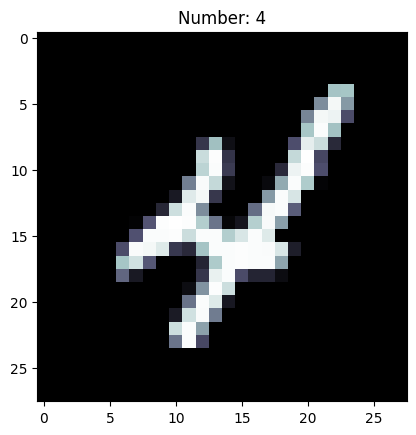

In [15]:
plt.imshow(num_to_visualize_reshaped, cmap='bone')
plt.axis = False
plt.title(f"Number: {y.iloc[num_index]}")
plt.show()

# Convert labels to type uint8

In [5]:
y = y.astype(np.uint8)

# Split the data set into training and testing

In [6]:
x_train, y_train = x[:60000], y[:60000]
x_test, y_test = x[60000:], y[60000:]

# Training the model with Stochastic Gradient Descent (SGD)

In [7]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

# Predicting a number with SGD


In [8]:
predicted_num_sgd = sgd_clf.predict([num_to_visualize])
print(f"Predicción SGD: {predicted_num_sgd}")

Predicción SGD: [4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


# Evaluation of the SGD model using cross-validation

In [13]:
y_train_pred_sgd = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
confusion_matrix_sgd = confusion_matrix(y_train, y_train_pred_sgd)
confusion_matrix_sgd

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

# Training the model with Random Forest

In [10]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Random Forest Model Evaluation Using Cross Validation

In [11]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3)
confusion_matrix_forest = confusion_matrix(y_train, y_train_pred_forest)
confusion_matrix_forest

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6635,   43,   11,   13,    5,    6,   13,   12,    3],
       [  27,   12, 5749,   30,   32,    4,   20,   37,   41,    6],
       [   7,    7,   91, 5811,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5645,    0,   28,   14,   17,   98],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [  26,   11,    5,    0,   12,   46, 5803,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   52,   26,   52,   27,    5, 5525,   76],
       [  21,   10,   14,   76,   75,   15,    3,   58,   45, 5632]])

# Visualization of confusion matrices

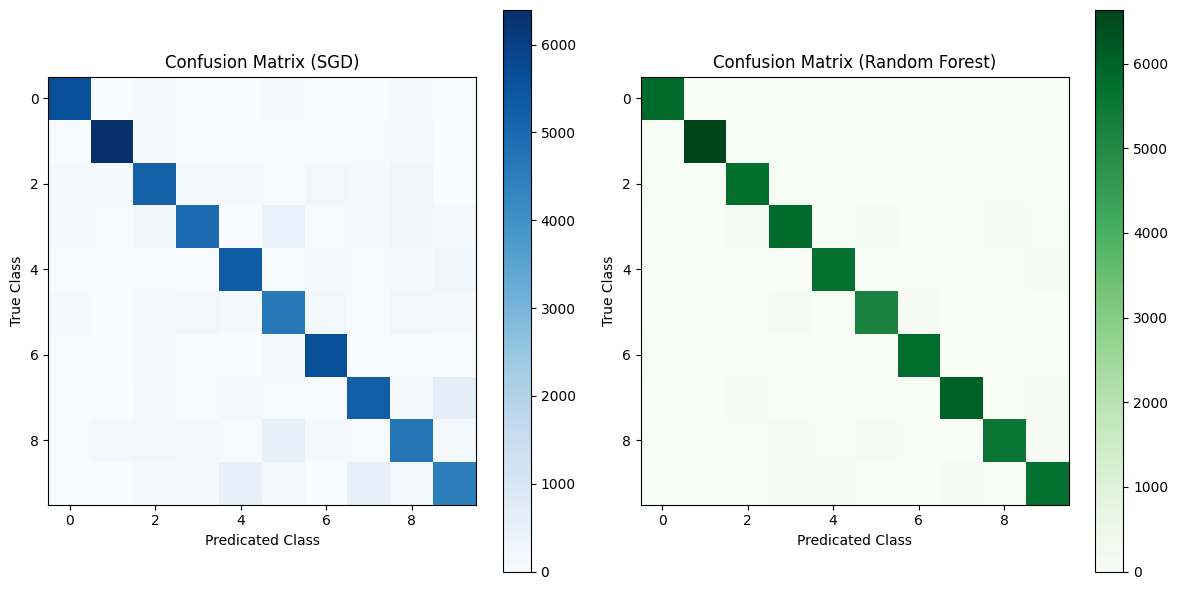

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(confusion_matrix_sgd, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (SGD)')
plt.colorbar()
plt.xlabel('Predicated Class')
plt.ylabel('True Class')

plt.subplot(1, 2, 2)
plt.imshow(confusion_matrix_forest, cmap='Greens', interpolation='nearest')
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
plt.xlabel('Predicated Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()